In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import resnet50
import matplotlib.pyplot as plt
import numpy as np

2023-09-30 23:28:36.719453: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


PIL image size :  (224, 224)


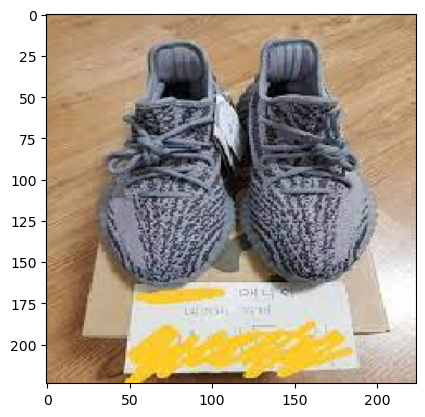

In [2]:
filename = './shoes_example2.jpg'
original = load_img(filename, target_size = (224,224))
print("PIL image size : ", original.size)
plt.imshow(original)
plt.show()

numpy array size :  (224, 224, 3)


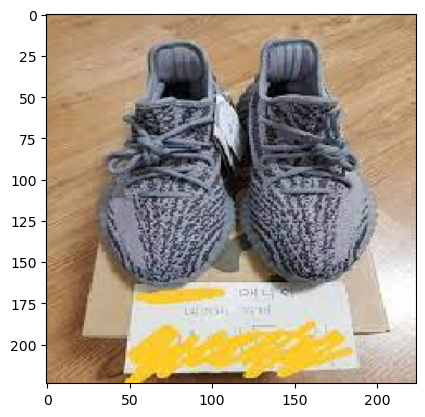

In [3]:
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print("numpy array size : ", numpy_image.shape)

In [4]:
# expand_dim 차원확대 : 이미지 여러 장 처리가 전재조건
image_batch = np.expand_dims(numpy_image , axis = 0)
print("image batch size : ", image_batch.shape)

image batch size :  (1, 224, 224, 3)


In [6]:
resnet_model = resnet50.ResNet50(weights = 'imagenet')  # weight 

In [8]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label = decode_predictions(predictions, top=3)  # labelling
print(label)

1/1 [==============================] - 0s 114ms/step
[[('n04120489', 'running_shoe', 0.59253514), ('n04133789', 'sandal', 0.20190084), ('n03047690', 'clog', 0.07554117)]]


In [9]:
#기존 구조 말단 : (None, 1000)
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           